In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("C:/Users/Narsing/Downloads/Assigments data science/4th-Assignment---Simple-Linear-Regression-main/Salary_Data.csv")

In [6]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data[data.duplicated()]

,YearsExperience,Salary


{'whiskers': [<matplotlib.lines.Line2D at 0x260c9a2ef80>,
 'caps': [<matplotlib.lines.Line2D at 0x260c9a2f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x260c9a2ecb0>,
 'medians': [<matplotlib.lines.Line2D at 0x260c9a2f9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x260c9a2fc70>,
 'means': []}

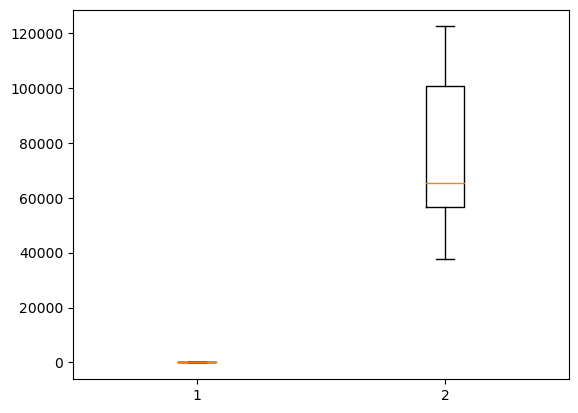

In [9]:
plt.boxplot(data)

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
import seaborn as sns

<Axes: >

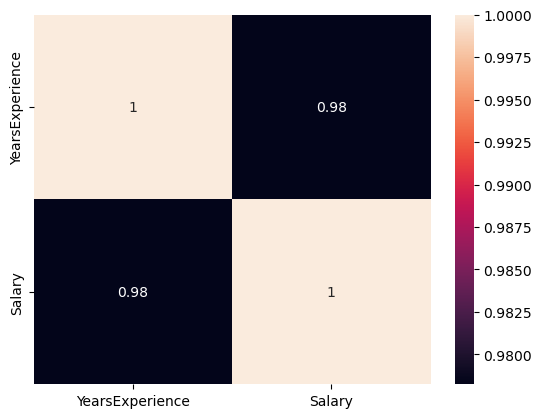

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1=scaler.fit_transform(data)
scaled_df=pd.DataFrame(df1,columns=data.columns)
scaled_df.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(data)
scaled_df = pd.DataFrame(df2, columns = data.columns)
scaled_df.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [15]:
data=data.rename({'YearsExperience':'years_experience', 'Salary':'salary'},axis=1)
data

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
import statsmodels.formula.api as smf
model = smf.ols(formula ='salary~years_experience', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        18:15:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

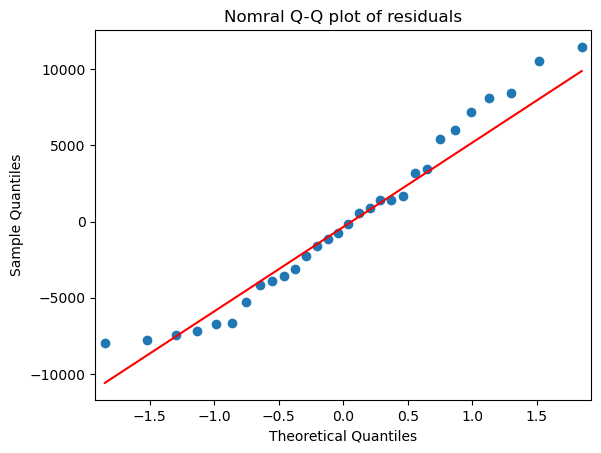

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Nomral Q-Q plot of residuals")
plt.show()

In [18]:
np.where(model.resid>10)

(array([ 0,  1,  5,  6,  8, 10, 17, 19, 20, 21, 22, 23, 24, 26],
       dtype=int64),)

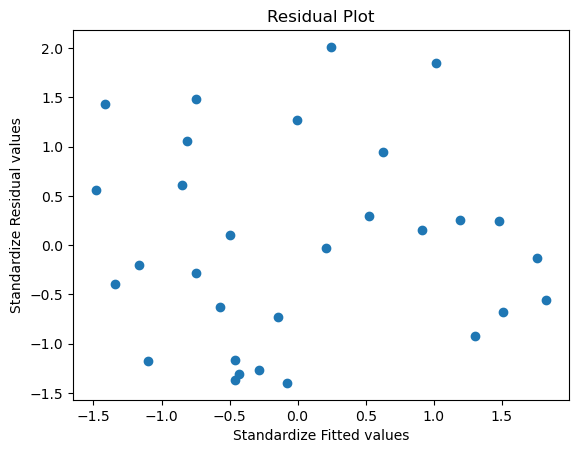

In [19]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residual Plot')
plt.show()

eval_env: 1


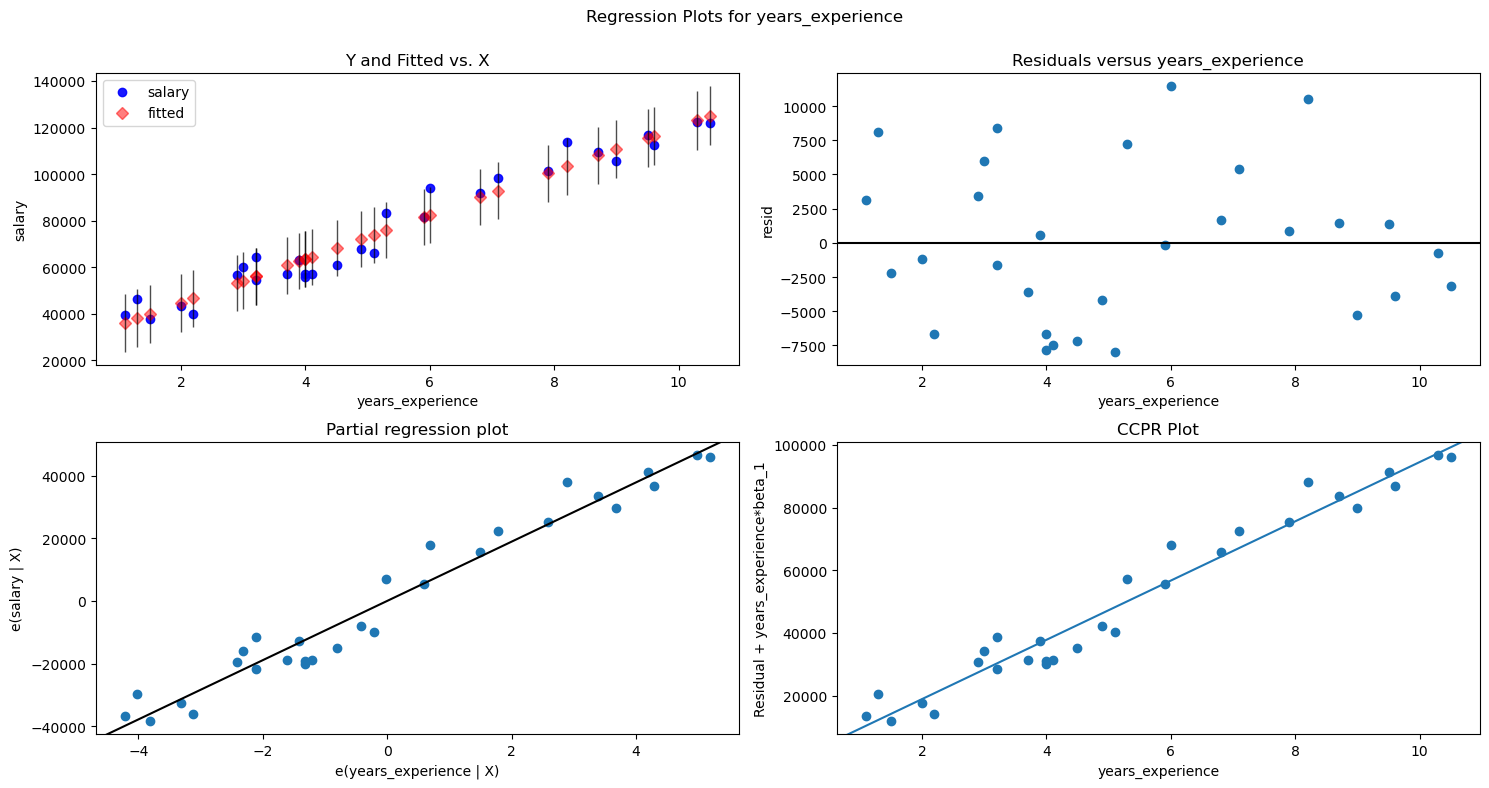

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "years_experience", fig=fig)
plt.show()

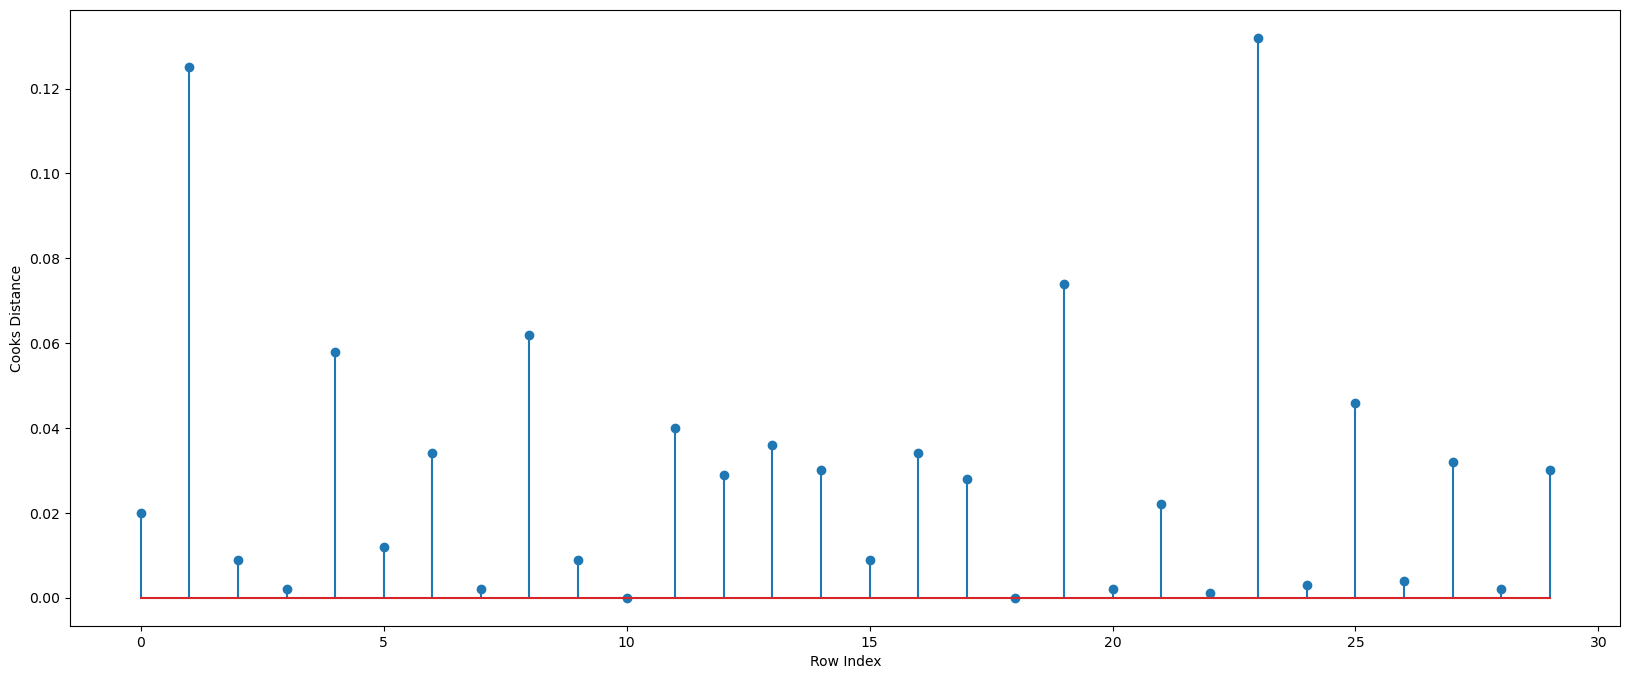

In [21]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
(np.argmax(c), np.max(c))

(23, 0.13175452313135222)

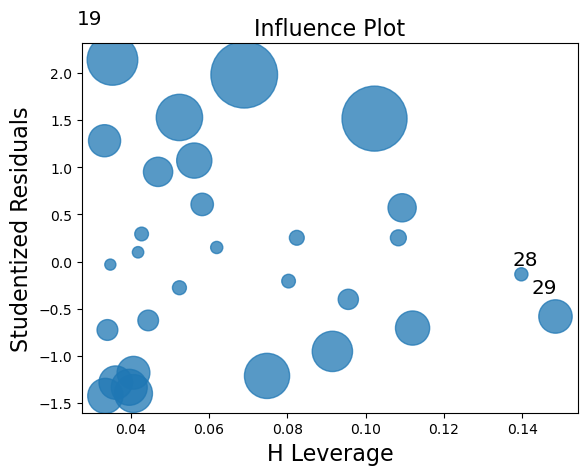

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.3

In [25]:
final_ml_v=smf.ols(formula ='salary~years_experience', data = data).fit()
(final_ml_v.rsquared,final_ml_v.aic)

(0.9569566641435086, 606.882316930432)

In [26]:
newdata = pd.Series([5,10])

In [29]:
data_pred = pd.DataFrame(newdata, columns = ['years_experience'])
data_pred

,years_experience
0,5
1,10


In [30]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
dtype: float64